In [2]:
import ROOT as r
import numpy as np
import matplotlib.pyplot as plt

Welcome to JupyROOT 6.12/06


In [3]:
ff = r.TFile("./18ParameterFit_ChangingCBO_PileupCorrectedByScan_2019_07_23_09_48_42.root")
ff.ls()

TFile**		./18ParameterFit_ChangingCBO_PileupCorrectedByScan_2019_07_23_09_48_42.root	
 TFile*		./18ParameterFit_ChangingCBO_PileupCorrectedByScan_2019_07_23_09_48_42.root	
  KEY: TH1D	18par;1	Wiggle Plot for [1700 < E (MeV) < 3100] in Calo 0
  KEY: TTree	t;4	Variable Tree
  KEY: TTree	t;3	Variable Tree
  KEY: TTree	t;2	Variable Tree
  KEY: TTree	t;1	Variable Tree
  KEY: TF1	18par_fitter;1	eighteen_parameter_fit
  KEY: TNamed	name;1	18par_fitter
  KEY: TNamed	fitOptions;1	REMB
  KEY: TPaveText	TPave;1	PaveText. A Pave with several lines of text.
  KEY: TH1D	h_resid_18par_fitter;1	Residuals
  KEY: TH1D	out_MAG P;1	FFT of Residuals of 18par_fitter in range 30 < t < 650


In [4]:
ff2 = r.TFile("./18ParameterFit_ChangingCBO_PileupCorrectedByScanFullRound2_2019_07_23_10_25_42.root")
fit_full2 = r.TF1(ff2.Get("18par_fitter"))

In [5]:
ft = r.TFile("./18ParameterFit_ChangingCBO_PileupCorrectedByScanTrunc_2019_07_24_01_21_59.root")

In [6]:
fit_full = r.TF1(ff.Get("18par_fitter"))
fit_trunc = r.TF1(ft.Get("18par_fitter"))

h_full = ff.Get("18par").Clone()
h_full.SetDirectory(0)
h_trunc = ft.Get("18par").Clone()
h_full.SetDirectory(0)

h_resid_full = ff.Get("h_resid_18par_fitter").Clone()
h_resid_full.SetDirectory(0)
h_resid_trunc = ft.Get("h_resid_18par_fitter").Clone()
h_resid_full.SetDirectory(0)

h_fft_full = ff.Get("out_MAG P").Clone()
h_fft_full.SetDirectory(0)
h_fft_trunc = ft.Get("out_MAG P").Clone()
h_fft_full.SetDirectory(0)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


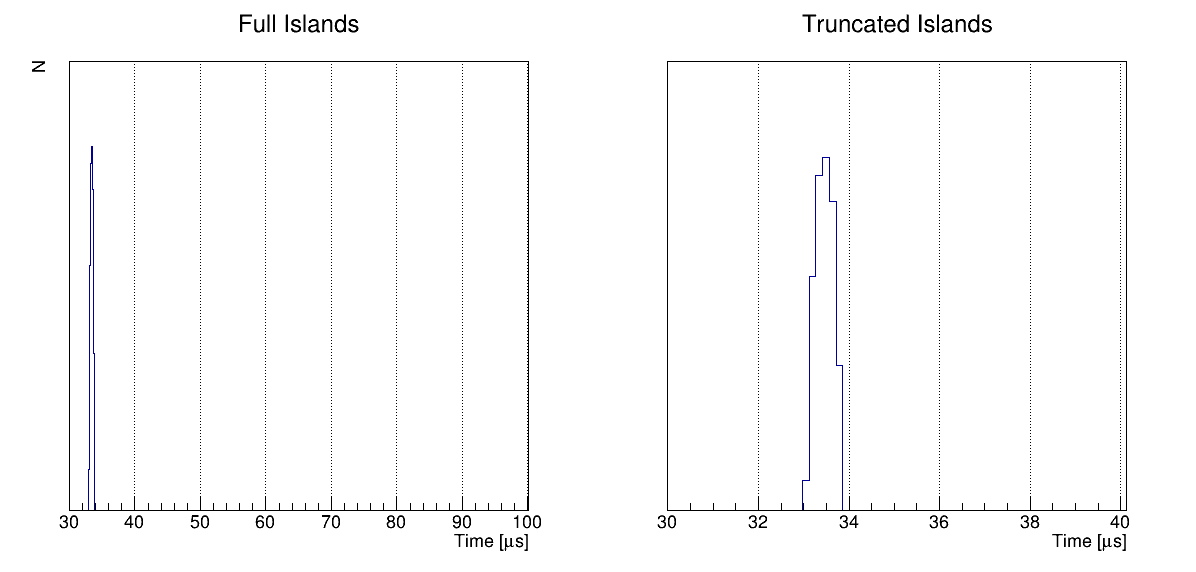

In [31]:
c = r.TCanvas("c","c",1200,600)
c.Divide(2)
c.cd(1)
h_full.GetXaxis().SetRangeUser(30,100)
h_full.SetTitle("Full Islands; Time [#mus]; N")
h_full.Draw("hist")
r.gPad.SetLogy()
r.gPad.SetGrid()
c.cd(2)
h_trunc.SetTitle("Truncated Islands; Time [#mus]")
h_trunc.Draw("hist")
r.gPad.SetLogy()
r.gPad.SetGrid()
c.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


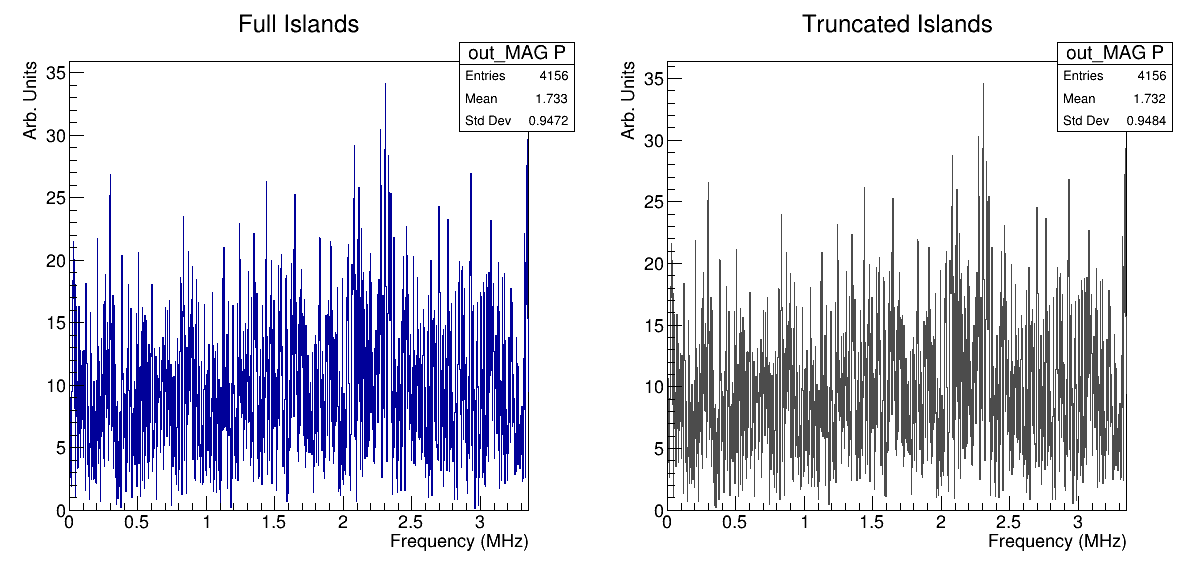

In [8]:
c = r.TCanvas("c","c",1200,600)
c.Divide(2)
c.cd(1)
h_fft_full.SetTitle("Full Islands")
h_fft_full.Draw("hist")
c.cd(2)
h_fft_trunc.SetTitle("Truncated Islands")
h_fft_trunc.Draw("hist")
c.Draw()

In [9]:
hdiff_fft = h_fft_full.Clone("hdiff_fft")
hdiff_fft.SetTitle("Differences in Fit Residual FFTs (Full - Truncated Islands)")
hdiff_fft.Add(h_fft_trunc, -1)

True

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


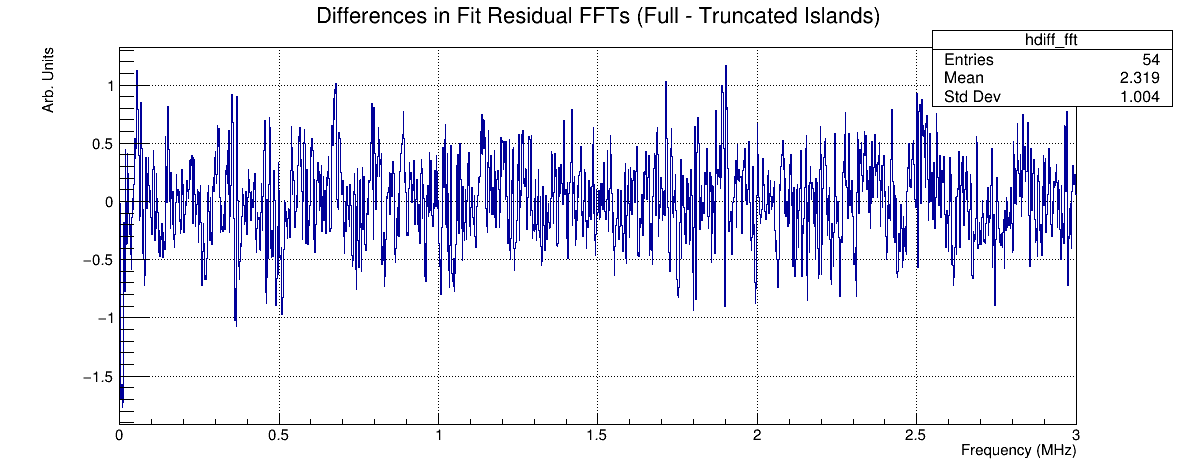

In [39]:
c = r.TCanvas("c","c",1200,500)
hdiff_fft.GetYaxis().UnZoom()
#hdiff_fft.GetYaxis().SetRangeUser(-0.0031,0.0031)
hdiff_fft.GetXaxis().SetRangeUser(0,3)
hdiff_fft.Draw("hist")
c.SetGrid()
c.Draw()

In [11]:
hdiff_resid = h_resid_full.Clone("hdiff_resid")
hdiff_resid.GetXaxis().UnZoom()
hdiff_resid.SetTitle("Differences in Fit Residuals (Full - Truncated Islands)")
hdiff_resid.Add(h_resid_trunc, -1)

hdiff_resid_inverse = hdiff_resid.Clone("hdiff_resid_inverse")
for i in range(hdiff_resid_inverse.GetNbinsX()+1):
    hdiff_resid_inverse.SetBinContent(i ,hdiff_resid_inverse.GetBinContent(i)*-1)
hdiff_resid_inverse.SetLineColor(2)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


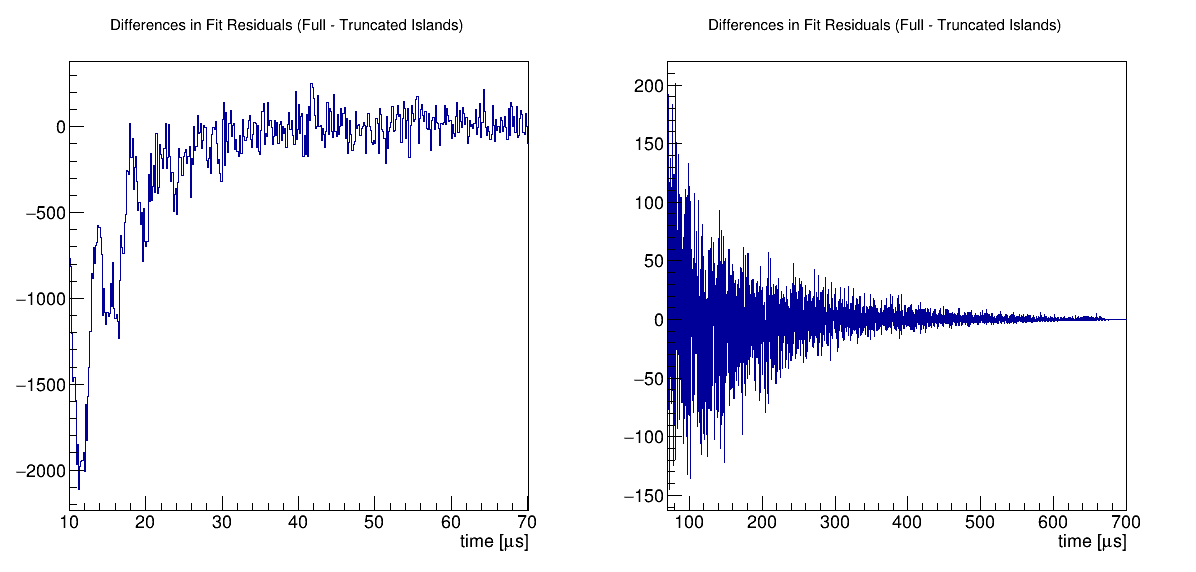

In [38]:
c = r.TCanvas("c","c",1200,600)
c.Divide(2)
c.cd(1)
#hdiff_resid.GetYaxis().SetRangeUser(-0.0031,0.0031)
hdiff_resid.GetXaxis().SetRangeUser(10,70)
hdiff_resid.DrawCopy("hist")

c.cd(2)
hdiff_resid.GetXaxis().SetRangeUser(70,700)
hdiff_resid.DrawCopy("hist")
#hdiff_resid_inverse.Draw("hist same")

ymax = 1000000
box = r.TBox(0,0,30,ymax)
box.SetFillColorAlpha(48,0.3)
box.Draw("SAME")

box2 = r.TBox(650,0,700,ymax)
box2.SetFillColorAlpha(48,0.3)
box2.Draw("SAME")

#c.SetLogy()
c.SetGrid()
c.Draw()

In [13]:
from omega_a_fitting import *

In [14]:
hdiff_resid_fft = fourierXformWiggle_HistOnly(hdiff_resid, 30, 650, 
                                              "FFT of Difference in Full - Truncated Residuals").Clone("hdiff_resid_fft")

Warning in <TFile::Append>: Replacing existing TH1: out_MAG P (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: out_MAG P (Potential memory leak).


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


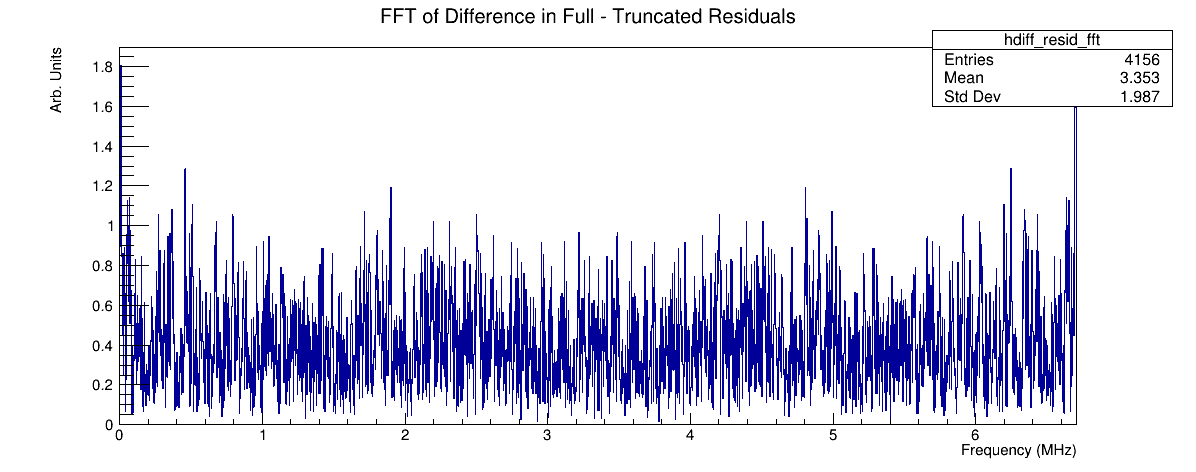

In [40]:
c = r.TCanvas("c","c",1200,500)
#hdiff_resid.GetYaxis().SetRangeUser(-0.0031,0.0031)
hdiff_resid_fft.Draw("hist")
#c.SetLogy()
c.Draw()

In [16]:
hdiff_raw = h_full.Clone("hdiff_raw")
hdiff_raw.GetXaxis().UnZoom()
hdiff_raw.Add(h_trunc,-1)

True

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


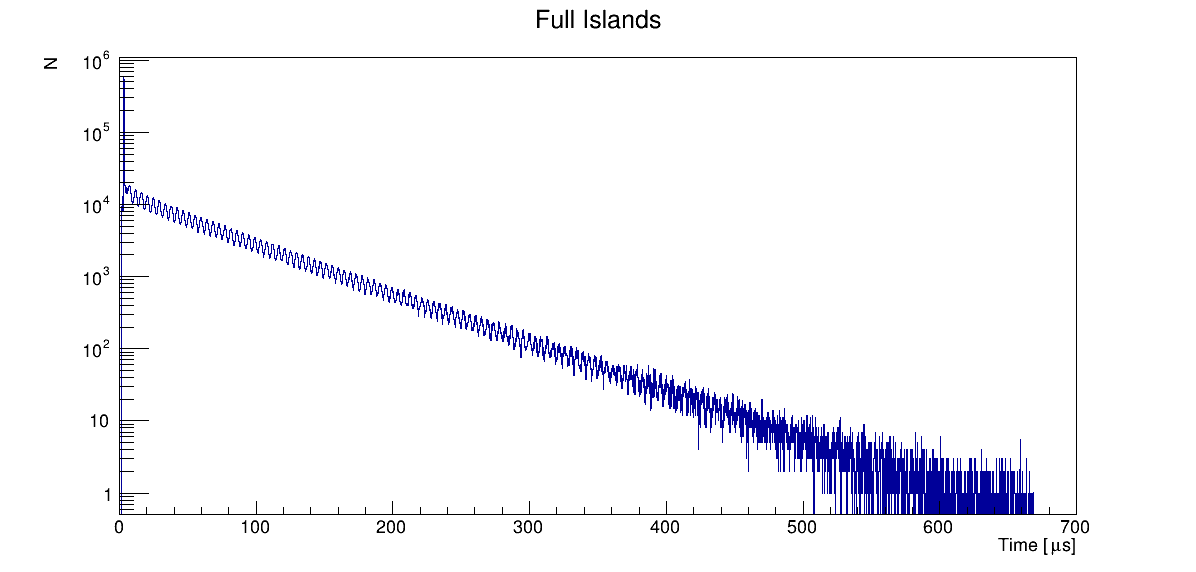

In [17]:
c = r.TCanvas("c","c",1200,600)
#hdiff_resid.GetYaxis().SetRangeUser(-0.0031,0.0031)
hdiff_raw.Draw("hist")
c.SetLogy()
c.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


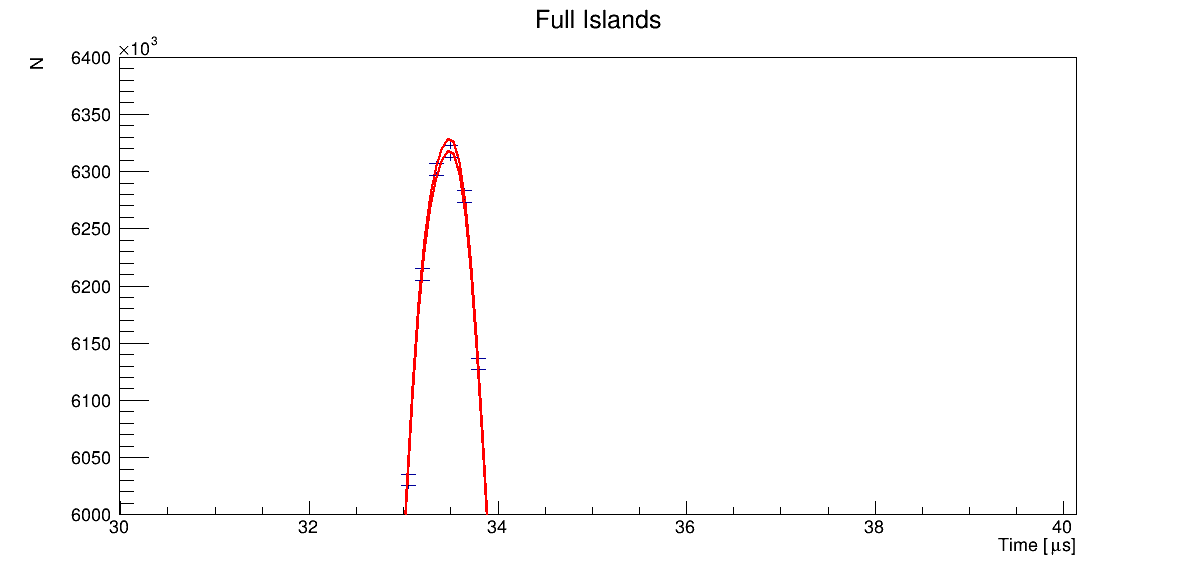

In [18]:
c = r.TCanvas("c","c",1200,600)
h_full.GetYaxis().SetRangeUser(6000000,6400000)
h_full.GetXaxis().SetRangeUser(30,40)

h_trunc.GetYaxis().SetRangeUser(6000000,6400000)
h_trunc.GetXaxis().SetRangeUser(30,40)

h_full.Draw()
h_trunc.Draw("same")
#c.SetLogy()
c.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


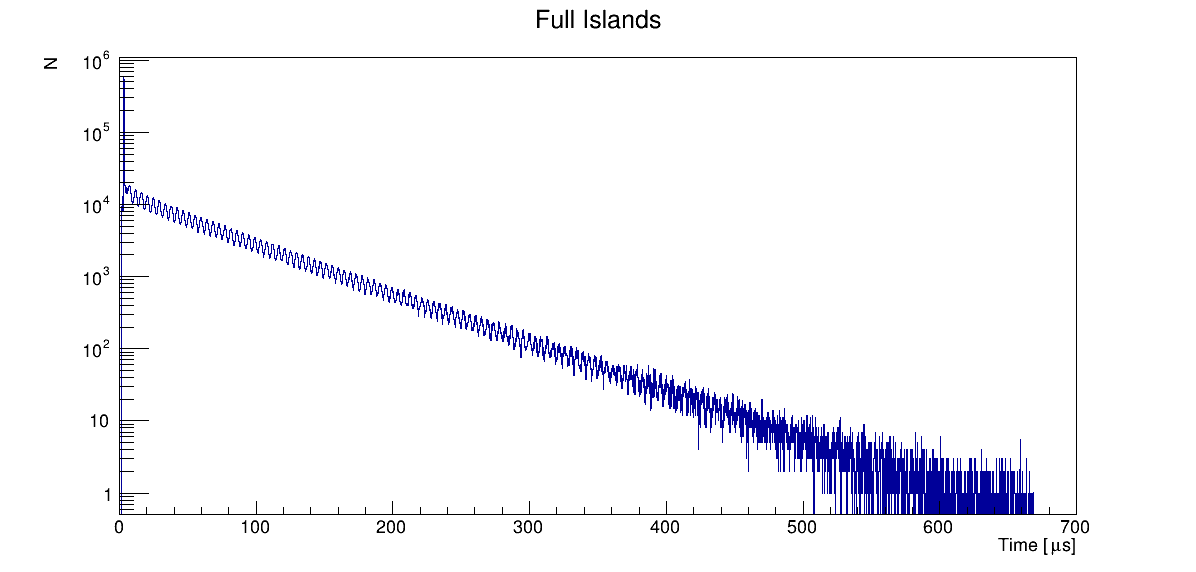

In [19]:
c = r.TCanvas("c","c",1200,600)
hdiff_raw.GetYaxis().UnZoom()
#hdiff_raw.GetYaxis().SetRangeUser(-0.0031,0.0031)
hdiff_raw.Draw("hist")
c.SetLogy()
c.Draw()

---

### Parameter differences 

In [20]:
from fit_util import *

N  ----  [(7826809.621394733, 5009.701171107381), (7806152.377881339, 5045.709348018027)]
#tau  ----  [(64.43725158158007, 0.0023799242063074206), (64.43699417282467, 0.00237710571500567)]
A  ----  [(0.3720619407732514, 2.927125717373428e-05), (0.37231202186557827, 2.9293917203012555e-05)]
R  ----  [(-46.5458920082627, 0.8807596917852157), (-46.51753652820313, 0.8808800533959039)]
#phi  ----  [(-1.0609132422373528, 0.0001446587253150599), (-1.0609184084804066, 0.00014468213879363949)]
A_{CBO - N}  ----  [(-0.0038739978198471118, 9.295151068746794e-05), (-0.0038562071584361383, 9.319718149071732e-05)]
A_{CBO - A}  ----  [(-0.0002986780273414512, 0.00016357899367849935), (0.0002842501213302506, 0.00016385605416084496)]
A_{CBO - #phi}  ----  [(-0.0005968653419231348, 0.00016959828009264152), (-0.0005930064952218743, 0.00016986219885660358)]
#tau_{CBO}  ----  [(207.1680218583828, 12.879384820177947), (206.28137312579247, 12.875015596497363)]
#omega_{CBO}  ----  [(2.611953936968986, 0.00029

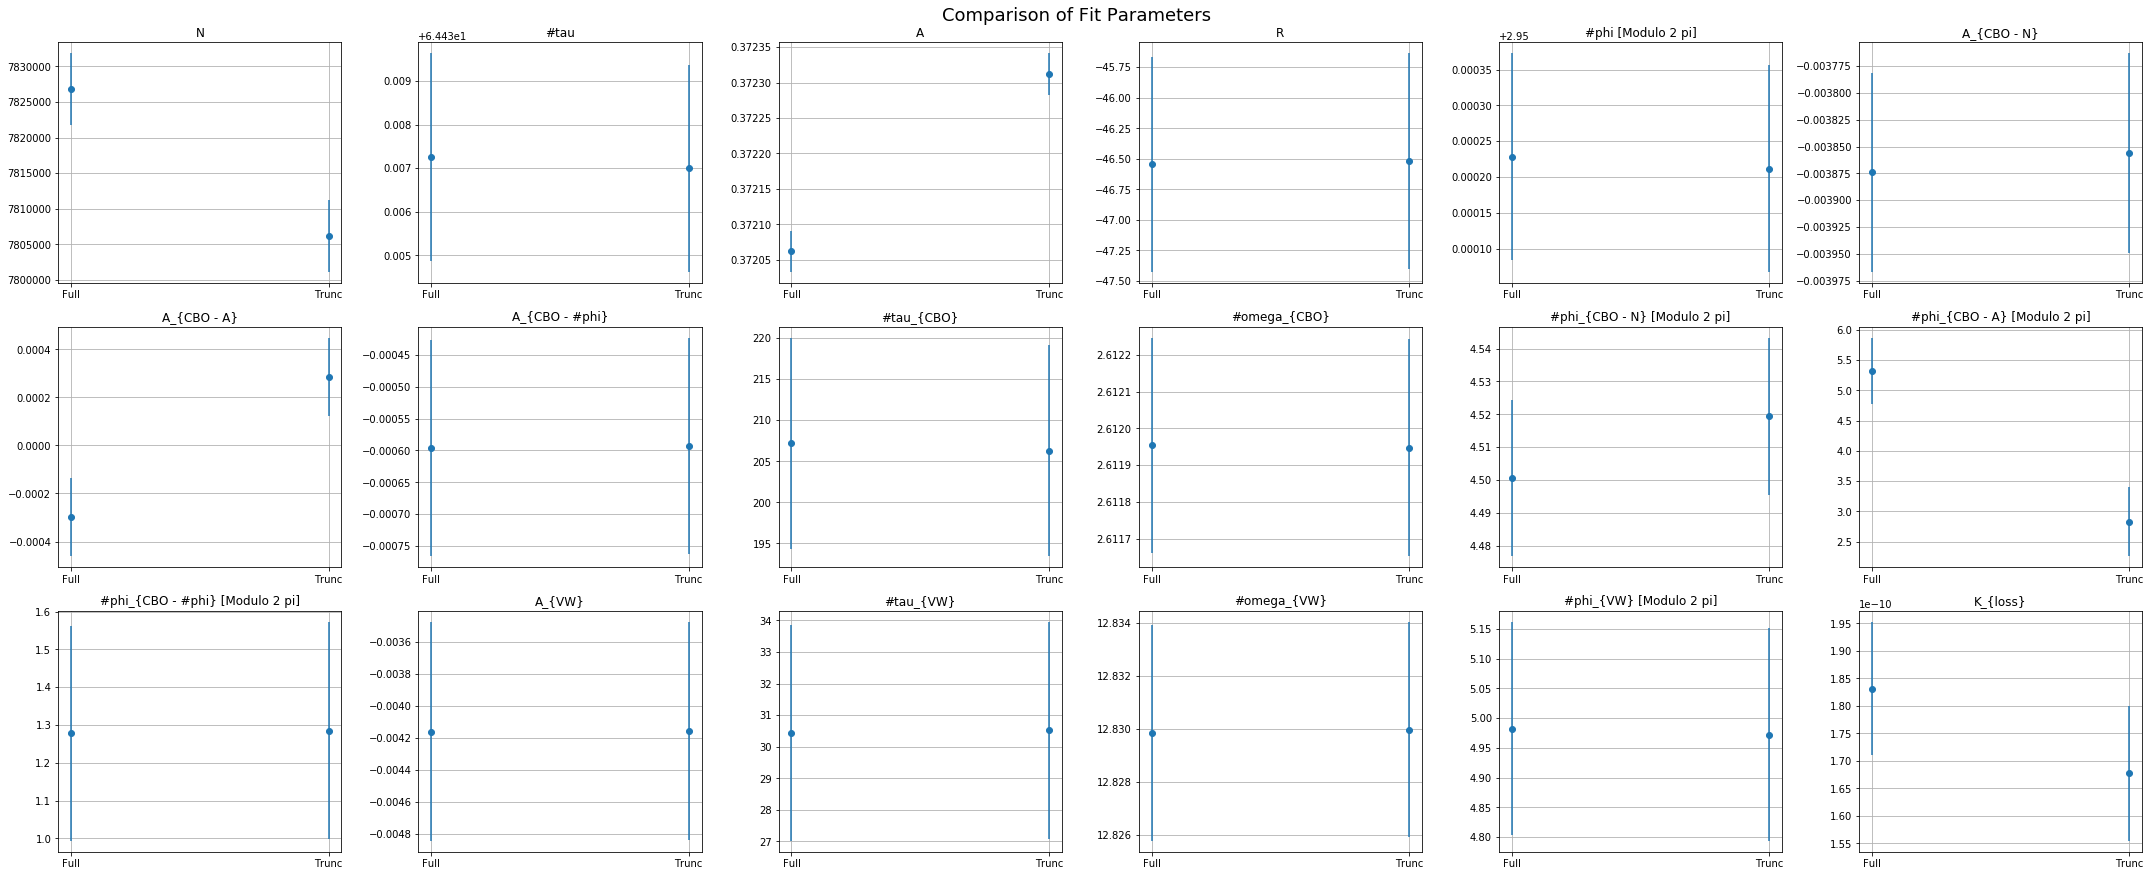

In [21]:
#CompareFitParameters( [fit_full, fit_trunc, fit_full2], 6, ("Full", "Trunc", "Full 2"), 0)
CompareFitParameters( [fit_full, fit_trunc], 6, ("Full", "Trunc"), 1)

In [41]:
( 7826809.621394733 - 7806152.377881339 ) / 7826809.621394733 * 100

0.26392929574940954

In [2]:
(0.3720619407732514 - 0.37231202186557827) / 0.3720619407732514 * 100

-0.06721490830455307

In [22]:
print("chiSq / NDF Full:", fit_full.GetChisquare(),"/", fit_full.GetNDF(),"=", fit_full.GetChisquare() / fit_full.GetNDF())
print("chiSq / NDF Trunc:", fit_trunc.GetChisquare(),"/", fit_trunc.GetNDF(),"=", fit_trunc.GetChisquare() / fit_trunc.GetNDF())

chiSq / NDF Full: 4253.330933815594 / 4138 = 1.0278711778191383
chiSq / NDF Trunc: 4252.9906114217565 / 4138 = 1.0277889346113476


In [23]:
print("R Value Full:", fit_full.GetParameter(3), "+/-",  fit_full.GetParError(3) )
print("R Value Truncated:", fit_trunc.GetParameter(3), "+/-",  fit_trunc.GetParError(3) )

print("delta R = ",  fit_full.GetParameter(3) - fit_trunc.GetParameter(3) )
print("        = ", (fit_full.GetParameter(3) - fit_trunc.GetParameter(3))*1000, "ppb")

R Value Full: -46.5458920082627 +/- 0.8807596917852157
R Value Truncated: -46.51753652820313 +/- 0.8808800533959039
delta R =  -0.028355480059566673
        =  -28.355480059566673 ppb


In [24]:
import uncertainties
Rfull = uncertainties.ufloat(fit_full.GetParameter(3),  fit_full.GetParError(3))
Rfull2 = uncertainties.ufloat(fit_full2.GetParameter(3),  fit_full2.GetParError(3))
Rtrunc = uncertainties.ufloat(fit_trunc.GetParameter(3),  fit_trunc.GetParError(3))

print(Rfull, Rtrunc)
print("delta R = ",  '{:.10u}'.format(Rfull - Rtrunc) )
print("        = ",  '{:.10u}'.format((Rfull - Rtrunc)*1000),"ppb" )

-46.5+/-0.9 -46.5+/-0.9
delta R =  -0.028355480+/-1.245667413
        =  -28.355480+/-1245.667413 ppb


In [25]:
print("delta R = ",  '{:.5u}'.format(Rfull - Rfull2) )

delta R =  -0.0015+/-1.2456


In [43]:
ding = [(7.694219262994921, 0.5484607739154088), (10.901735717879674, 0.577128404863228)]
print(ding[0][0], ding[1][0] - math.pi)

7.694219262994921 7.760143064289881


---

### Differences in fit functions

In [26]:
def fit_diff(x, p):
    return fit_full.Eval(x[0]) - fit_trunc.Eval(x[0])

func_diff = r.TF1("func_diff", fit_diff, 0, 0, 700)

In [27]:
h = r.TH1D("h","h",47000,0,700)
for i in range(h.GetNbinsX()):
    h.SetBinContent(i, func_diff.Eval(h.GetBinCenter(i)))

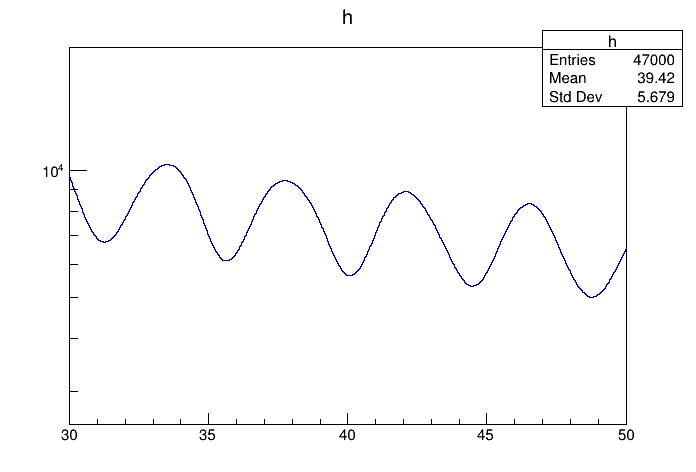

In [28]:
c = r.TCanvas()
h.Draw()
h.GetXaxis().SetRangeUser(30,50)
c.SetLogy()
c.Draw()

In [29]:
h_fft = fourierXformWiggle_HistOnly(h,30,650,"FFT of Difference in Fit Functions").Clone("h_fft")

Warning in <TFile::Append>: Replacing existing TH1: out_MAG P (Potential memory leak).


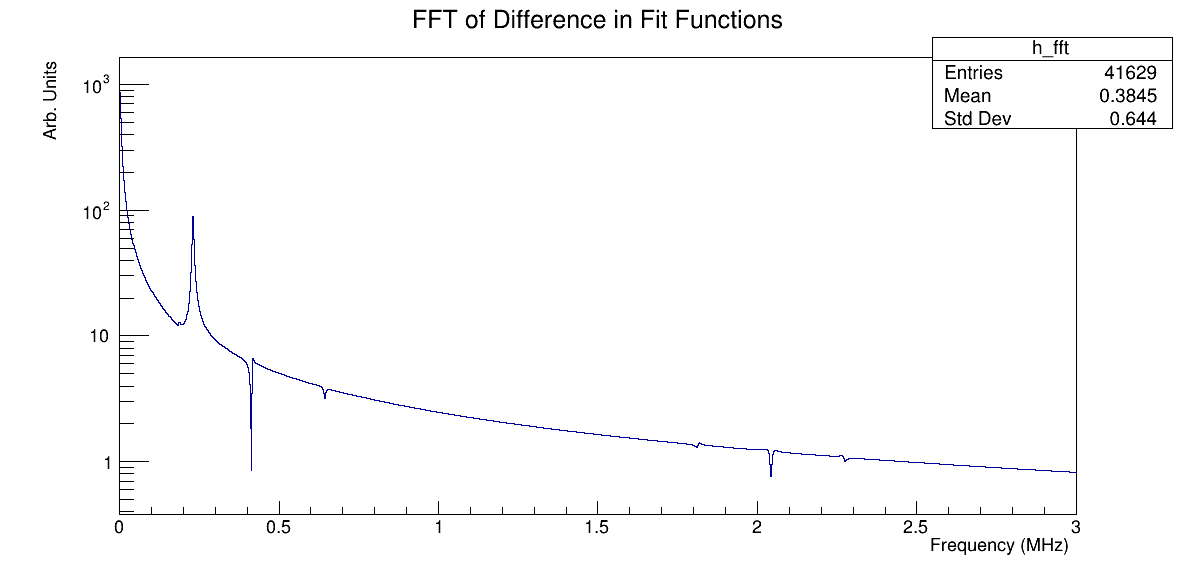

In [30]:
c = r.TCanvas("c","c",1200,600)
h_fft.Draw("hist")
h_fft.GetXaxis().SetRangeUser(0,3)
c.SetLogy()
c.Draw()